<a href="https://colab.research.google.com/github/davegbade/Prediction-of-Product-Sales/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of Product Sales**
David Gbadebo

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Data**

In [3]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sale_predictions = pd.read_csv(fpath)
     

In [4]:
df_sale_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_sale_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df2 = df_sale_predictions.copy()

# **Data Cleaning**

In [7]:
print(df_sale_predictions.shape)

(8523, 12)


In [8]:

# Get the datatypes of each variable
df_sale_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# **Duplicated Data**

In [9]:
# Check for duplicate rows
print(df_sale_predictions.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [10]:
df_sale_predictions.duplicated().sum()

0

# **Missing Values**

In [11]:
# Drop the row that contains all missing values
df_sale_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#dentifying % of missing data (optional)
df_sale_predictions.isna().sum() / len(df_sale_predictions) * 100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-13-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-13-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [14]:
df_sale_predictions['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

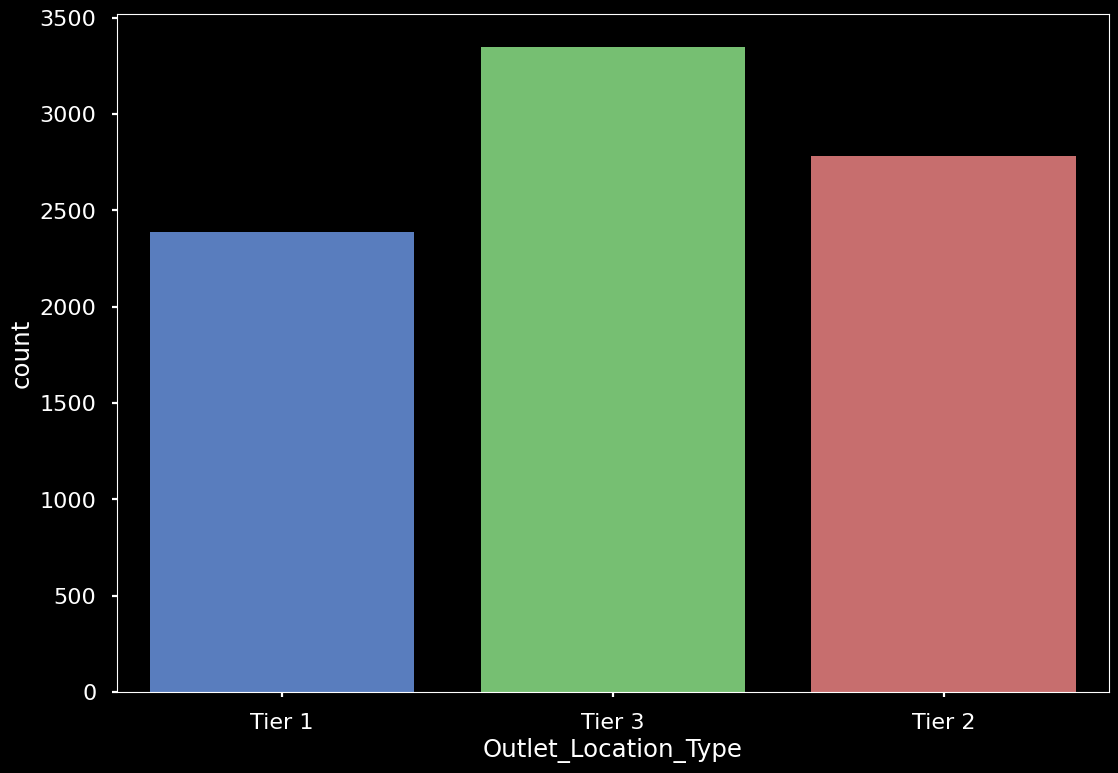

In [15]:
ax = sns.countplot(data = df_sale_predictions, x = 'Outlet_Location_Type');

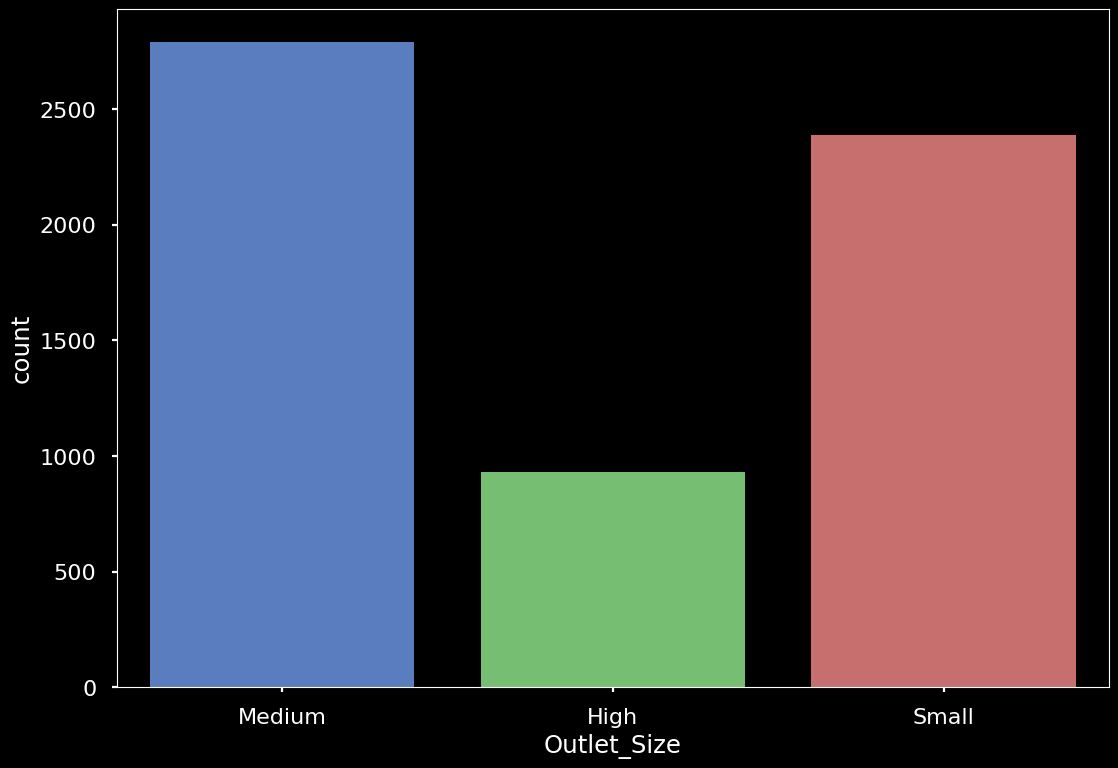

In [16]:
ax = sns.countplot(data = df_sale_predictions, x = 'Outlet_Size');

This graph shows that there the Missing values on 2nd green bar

Strategy #1: To deal with the missing values, we could simply drop the missing values.

Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.

Strategy #3: To deal with the missing values, we could fill them in with the word Unknown for this feature.

We will select Strategy #3 to fill in the missing values with the word Unknown so that the values will be filled in, but we will still be aware that those values are unknown.

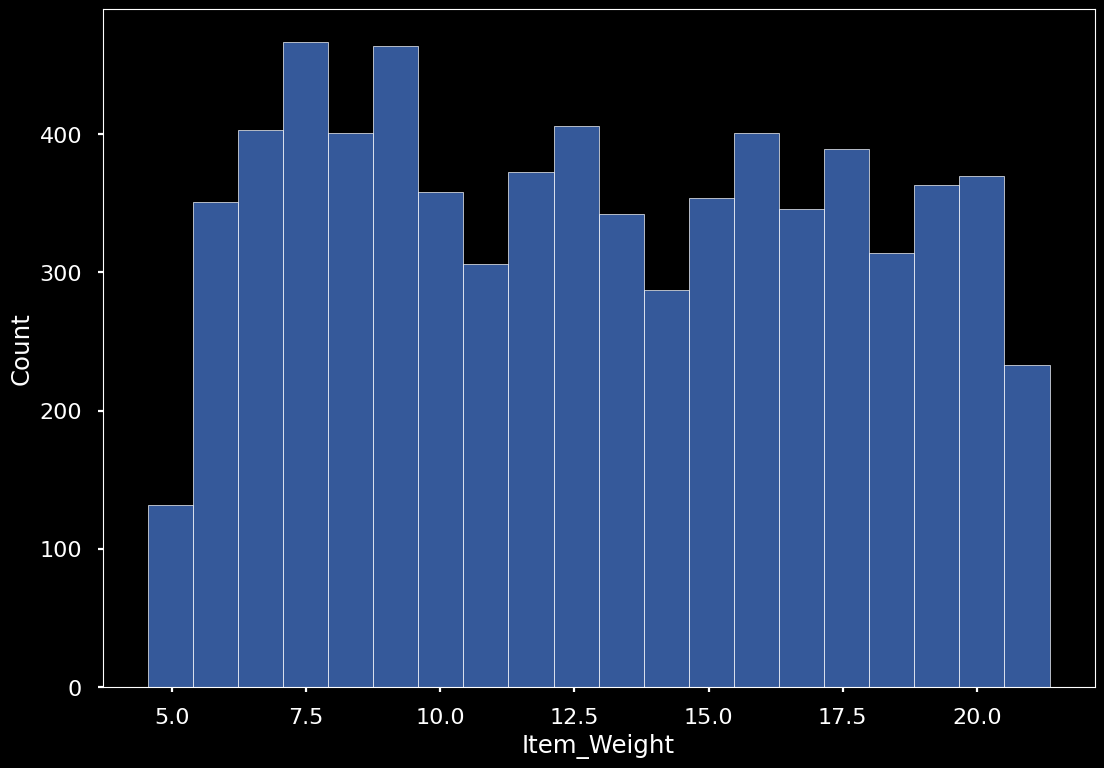

In [17]:
ax = sns.histplot(data = df_sale_predictions, x = 'Item_Weight')

This histogram shows that the majority of the majority of Item_Weight are around 12.5.

Strategy #1: To deal with the missing values, we could simply drop the missing values.
Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.
Strategy #3: To deal with the missing values, we could fill them in with the median/mean value for this feature.
To maintain as much data as possible, we will not drop the data. So we will choose either Strategy #2 or Strategy #3. To make this choice we will do a bit more investigating.

In [18]:
dtypes = df_sale_predictions.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df_sale_predictions[col].value_counts(dropna=False))
    print('\n\n')

- Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    9

In [20]:
# Replace the missing values in 'Item_Weight' with the median
df_sale_predictions['Item_Weight'].fillna(df_sale_predictions['Item_Weight'].median(), inplace=True)

In [21]:
#Addressing the missing value in Outlet_Size Colunm (Missing value replace with Unknown)
df_sale_predictions['Outlet_Size'] = df_sale_predictions['Outlet_Size'].fillna('Unknown')

In [22]:
df_sale_predictions.isna().sum()
     

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

No more Missing items

# **Fixing Data Types**

1.   We will now address the data types and make sure that they match the data 


dictionary. 

In [23]:
df_sale_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Inspecting Categorical Columns & Addressing Inconsistent Values**

*   We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further




In [24]:
data_types = df_sale_predictions.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [25]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sale_predictions[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

In [26]:

# Check for inconsistencies by inspecting the value_counts 

print(df_sale_predictions['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [27]:

print(df_sale_predictions['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


In [28]:
print(df_sale_predictions['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [29]:
df_sale_predictions['Item_Fat_Content'] = df_sale_predictions['Item_Fat_Content'].replace('LF','Low Fat')

In [30]:
df_sale_predictions['Item_Fat_Content'] = df_sale_predictions['Item_Fat_Content'].replace('reg','Regular')


In [31]:
# Replace the different options in Item_Fat_Content to "Low Fat" and "Regular"
df_sale_predictions['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [32]:
print(df_sale_predictions['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


# Summary Statistics for Numeric Features


*  We will now view use df.describe() to view the summary statistics for the numeric features.

In [33]:
print(df_sale_predictions.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


*   Here is another method to look at just the mean, min, and max for each numeric column.


column.

In [34]:
stats =  df_sale_predictions.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


Look like there is an extreme value in Item_Outlet_Sales max f 13086.964800, this could a mistakebut we make make more research.

In [35]:
# Let's investigate the rows with missing information
df_sale_predictions.loc[df_sale_predictions.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# **Project 1 - Part 3**
For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!




# **Exploratory Visuals & Analysis**


* Note: There are many different ways students could tackle this EDA. 
* Additionally, there are more advanced ways to plot the data.
* Approaches

We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [36]:
# Checking info again
df_sale_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
num_cols = df_sale_predictions.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [39]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-39-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-39-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [40]:
df_sale_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

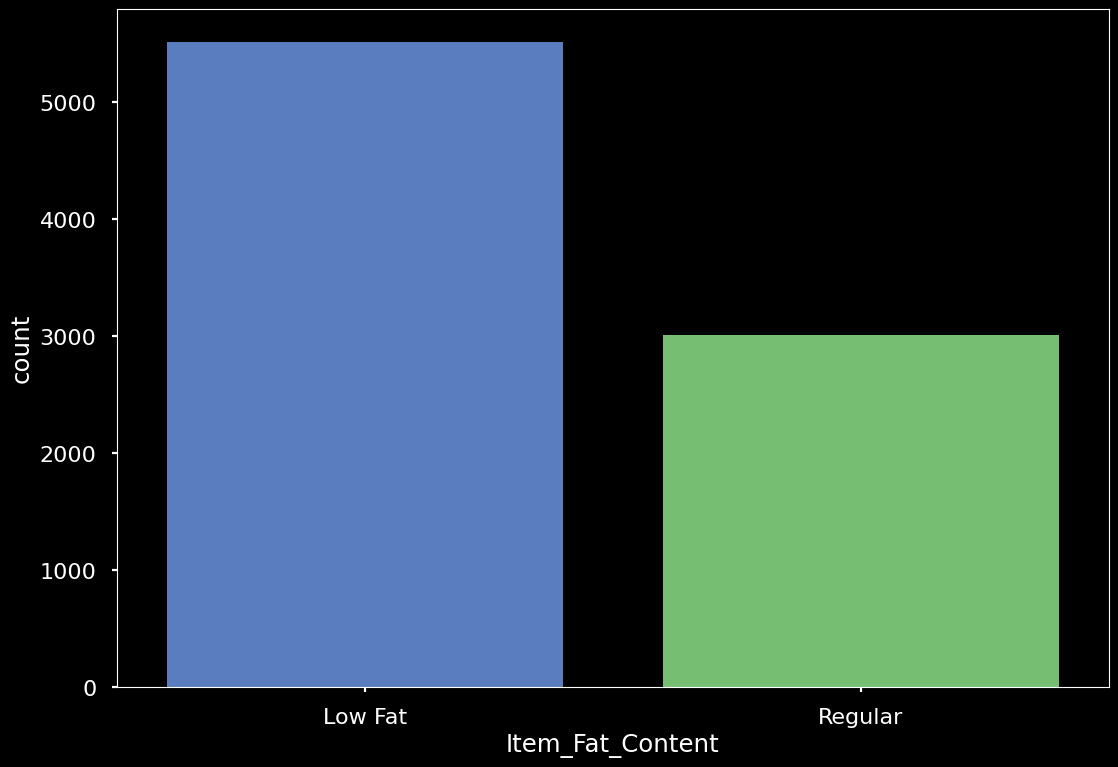

In [41]:
ax = sns.countplot(data = df_sale_predictions, x = 'Item_Fat_Content');

<Axes: >

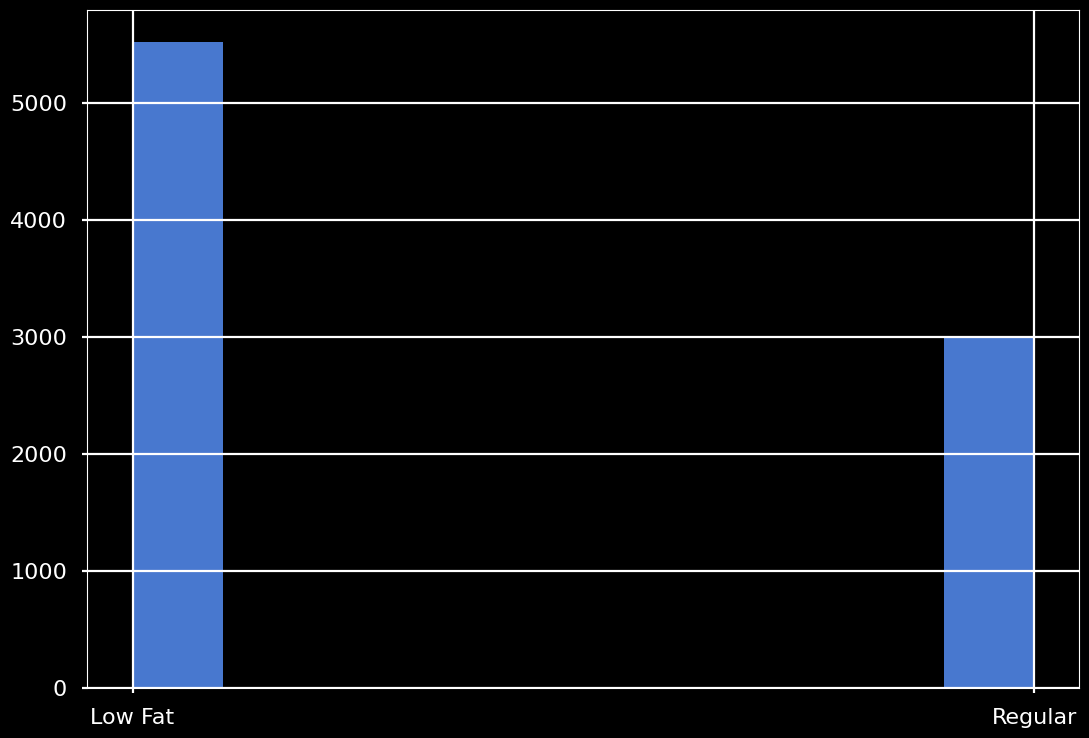

In [42]:

# Create histogram for Item_Fat_Content
df_sale_predictions['Item_Fat_Content'].hist()

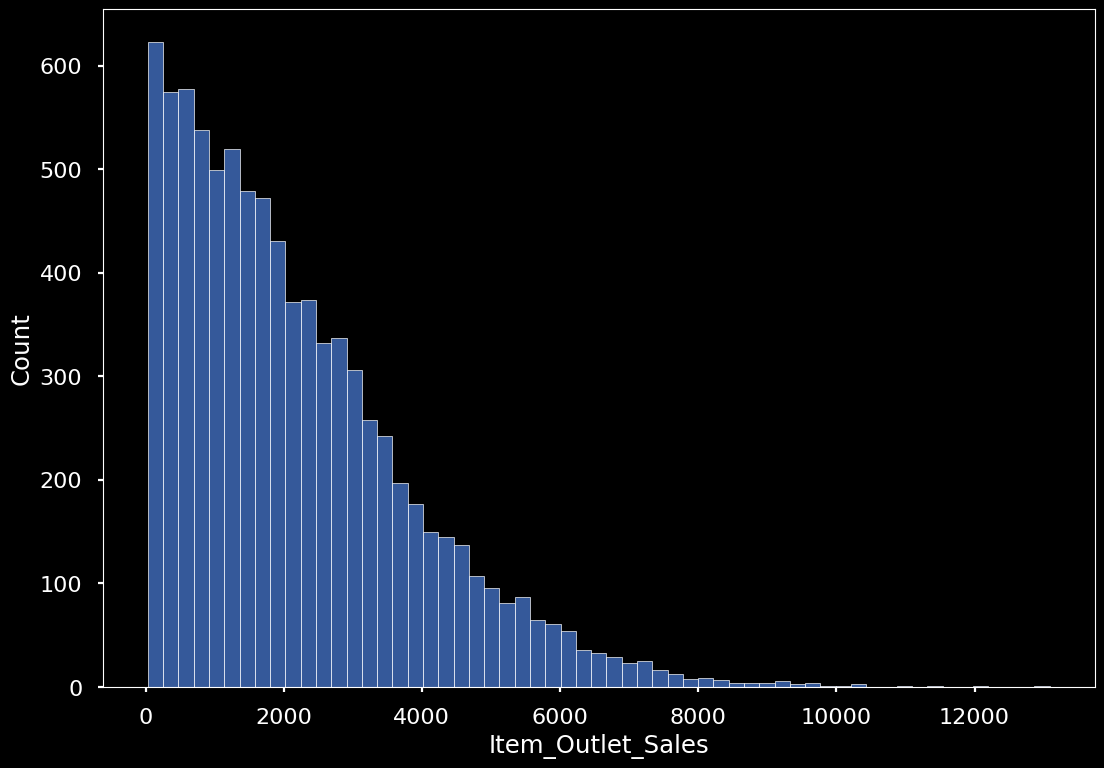

In [43]:
ax = sns.histplot(data = df_sale_predictions, x = 'Item_Outlet_Sales')

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

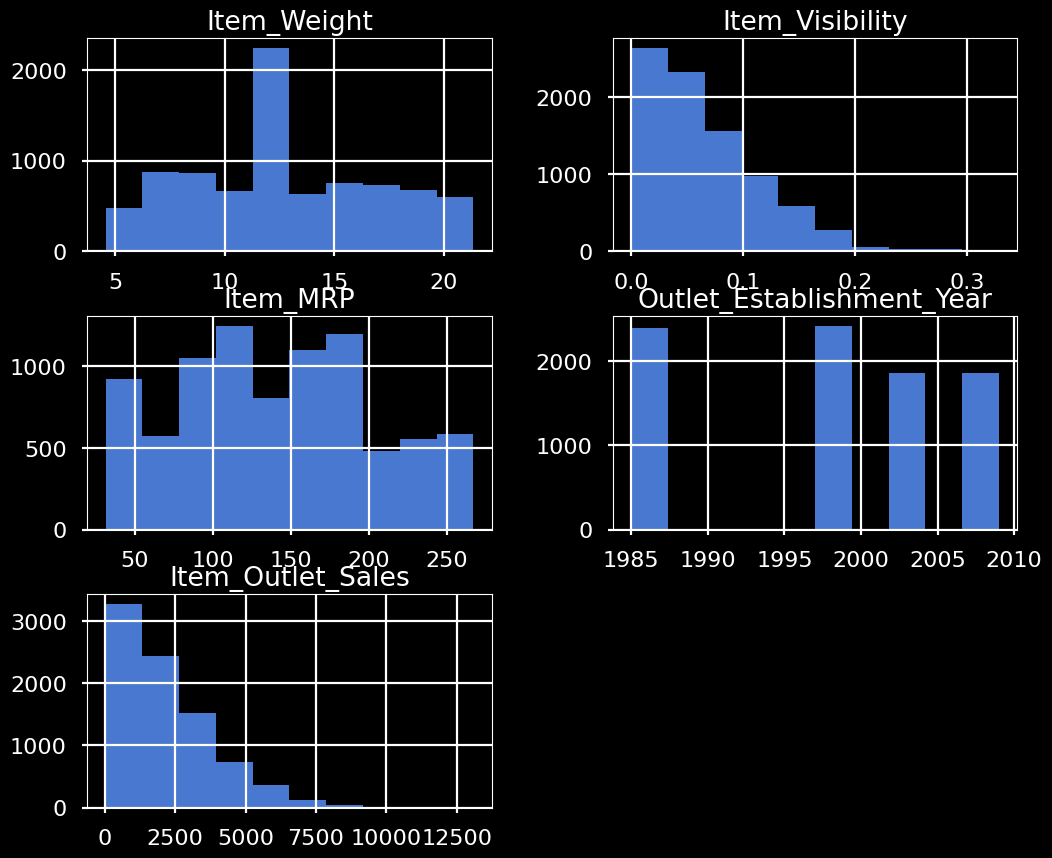

In [44]:

df_sale_predictions.hist(figsize=(12,10))

<ipython-input-45-d33484757157>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sale_predictions.corr(), annot=True)


<Axes: >

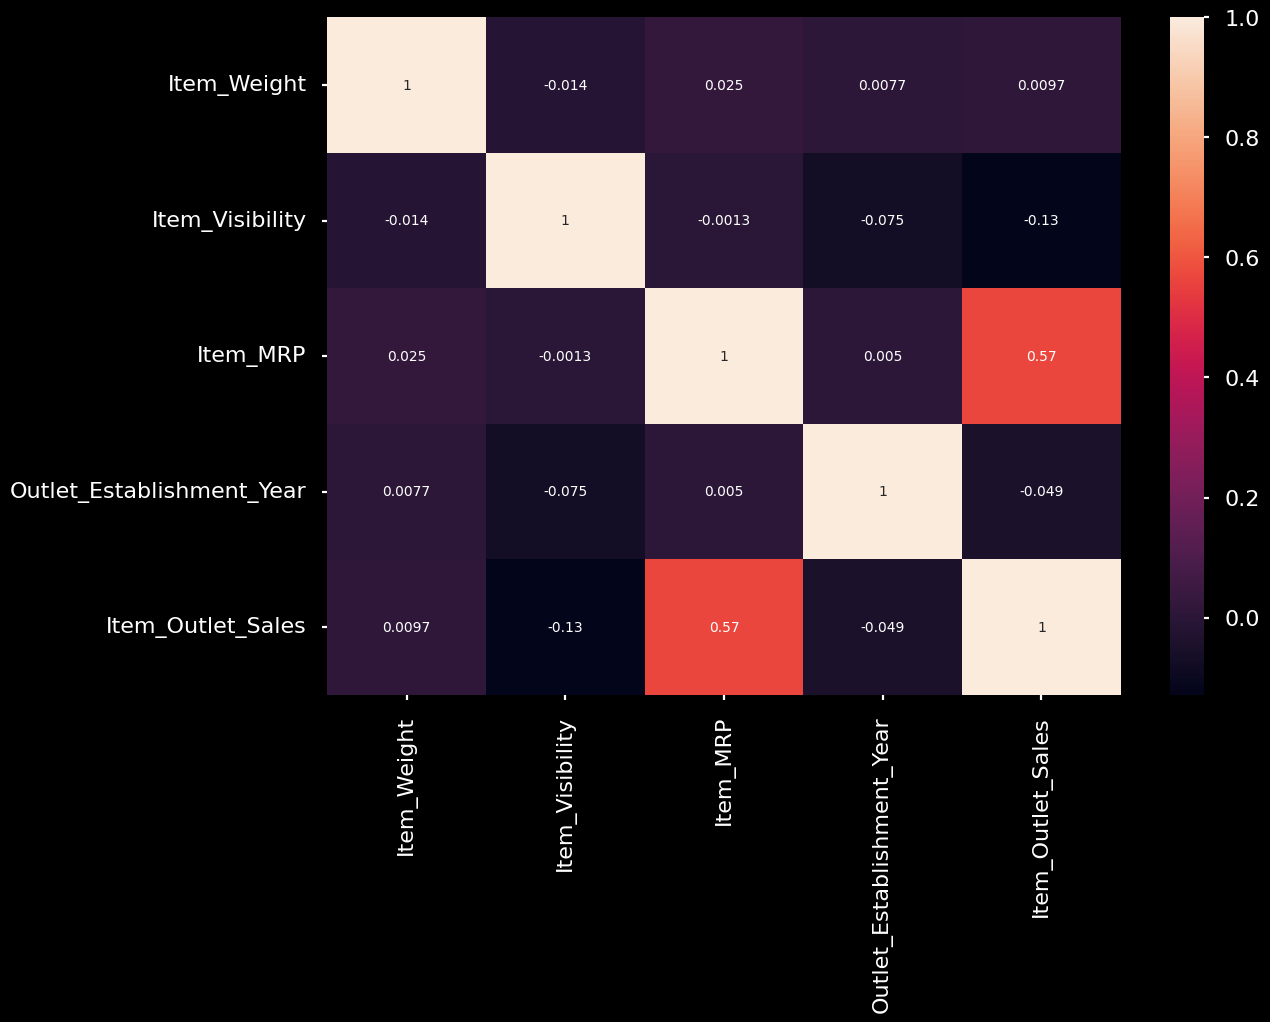

In [45]:

# Heatmap of the correlation between features
sns.heatmap(df_sale_predictions.corr(), annot=True)

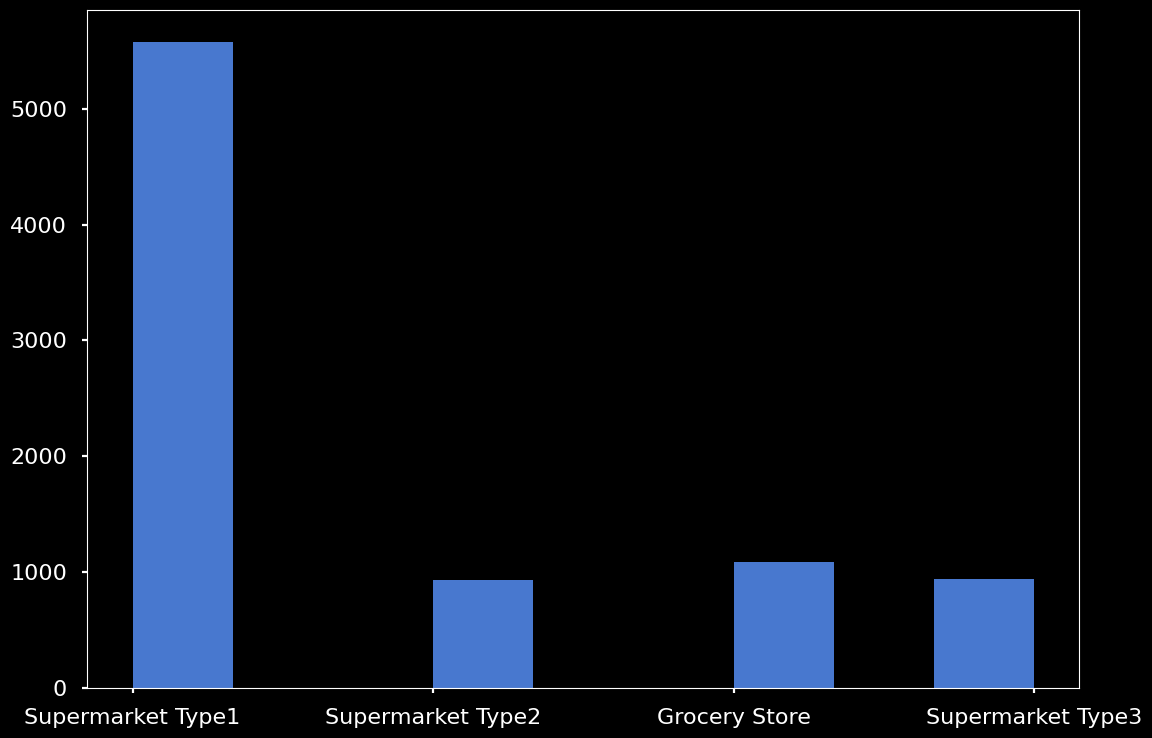

In [46]:
plt.hist(df_sale_predictions['Outlet_Type'], bins=9) # plot a histogram with 9 bins
plt.show()

# **Explanatory Data Analysis**

In [47]:

 #Group the data by Outlet_Size and calculate the mean Item_Outlet_Sales for each group
grouped = df_sale_predictions.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

<ipython-input-48-9777a85a1c34>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-48-9777a85a1c34>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


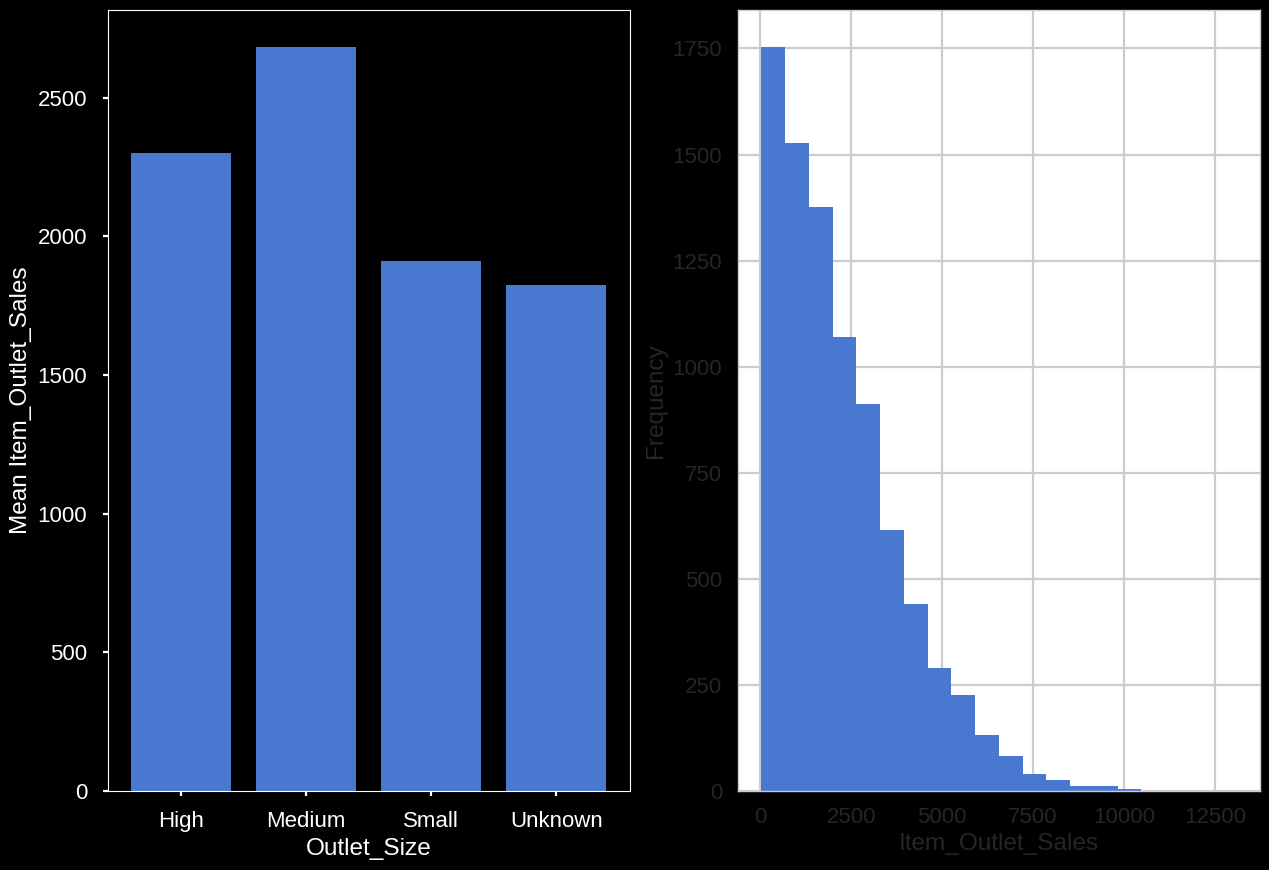

In [48]:

 #Group the data by Outlet_Size and calculate the mean Item_Outlet_Sales for each group
grouped = df_sale_predictions.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

# Plot the grouped data as a bar chart on the left subplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
# Set the style to 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')
plt.bar(grouped.index, grouped.values)
plt.xlabel('Outlet_Size')
plt.ylabel('Mean Item_Outlet_Sales')

# Plot the Item_Outlet_Sales as a histogram on the right subplot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.hist(df_sale_predictions['Item_Outlet_Sales'], bins=20)
# Set the style to 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

# **The correlation between two variables is a measure of how they are related to each other. A correlation coefficient is a number between -1 and 1 that indicates the strength and direction of the relationship. A positive correlation means that the variables tend to move in the same direction, while a negative correlation means that they tend to move in opposite directions. A correlation coefficient close to 0 means that there is no linear relationship between the variables.**

To calculate the correlation coefficient between Item_Outlet_Sales and Outlet_Size, you need to convert Outlet_Size into a numerical variable first, since it is a categorical variable. One way to do this is to use label encoding, which assigns a numerical value to each category based on the alphabetical order. For example:

In [49]:

# Import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Create an instance of label encoder
le = LabelEncoder()

# Fit and transform Outlet_Size using label encoder
df_sale_predictions['Outlet_Size_Encoded'] = le.fit_transform(df_sale_predictions['Outlet_Size'])

# Print the encoded values and their corresponding categories
print(le.classes_)
print(le.transform(le.classes_))
     

['High' 'Medium' 'Small' 'Unknown']
[0 1 2 3]


In [50]:
# Import numpy library
import numpy as np

# Calculate the correlation coefficient between Item_Outlet_Sales and Outlet_Size_Encoded
corr = np.corrcoef(df_sale_predictions['Item_Outlet_Sales'], df_sale_predictions['Outlet_Size_Encoded'])[0, 1]

# Print the correlation coefficient
print(corr)

-0.17247691133359247


This means that there is a weak negative correlation between Item_Outlet_Sales and Outlet_Size_Encoded, meaning that smaller outlets tend to have higher sales than larger outlets, but the relationship is not very strong or consistent.

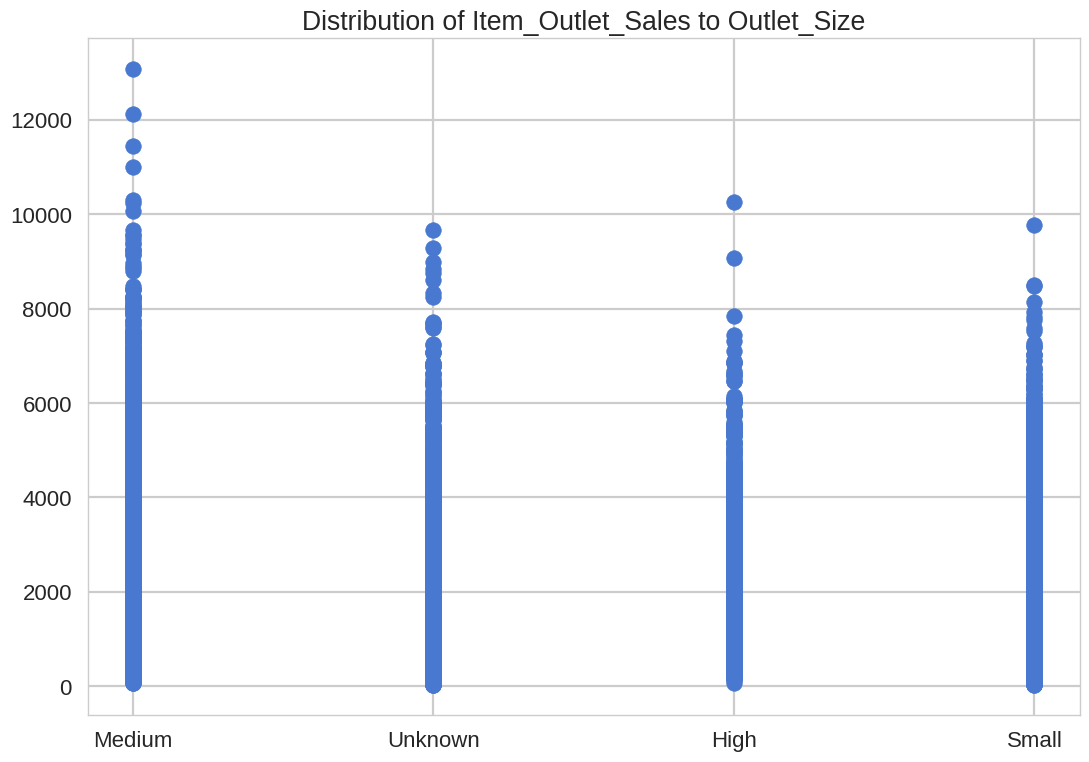

In [51]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Plot the graph
plt.scatter(df_sale_predictions['Outlet_Size'], df_sale_predictions['Item_Outlet_Sales'])

# Add a label to the graph
plt.title('Distribution of Item_Outlet_Sales to Outlet_Size')

# Add a grid to the graph
plt.grid(True)

# Show the graph
plt.show()




# Show the graph
plt.show()

The implication of these graphs is that there is a weak negative relationship between Item_Outlet_Sales and Outlet_Size_Encoded, meaning that smaller outlets tend to have higher sales than larger outlets, but the relationship is not very strong or consistent. The scatter plot shows the distribution of the data points and the correlation coefficient. The histogram shows the frequency of different values of Item_Outlet_Sales. These graphs can help you explore and understand the data better, but they do not imply any causal relationship between the variables.

"To draw a linear graph showing the relationship between Item_Visibility and Item_Outlet_Sales, you can use the following code:

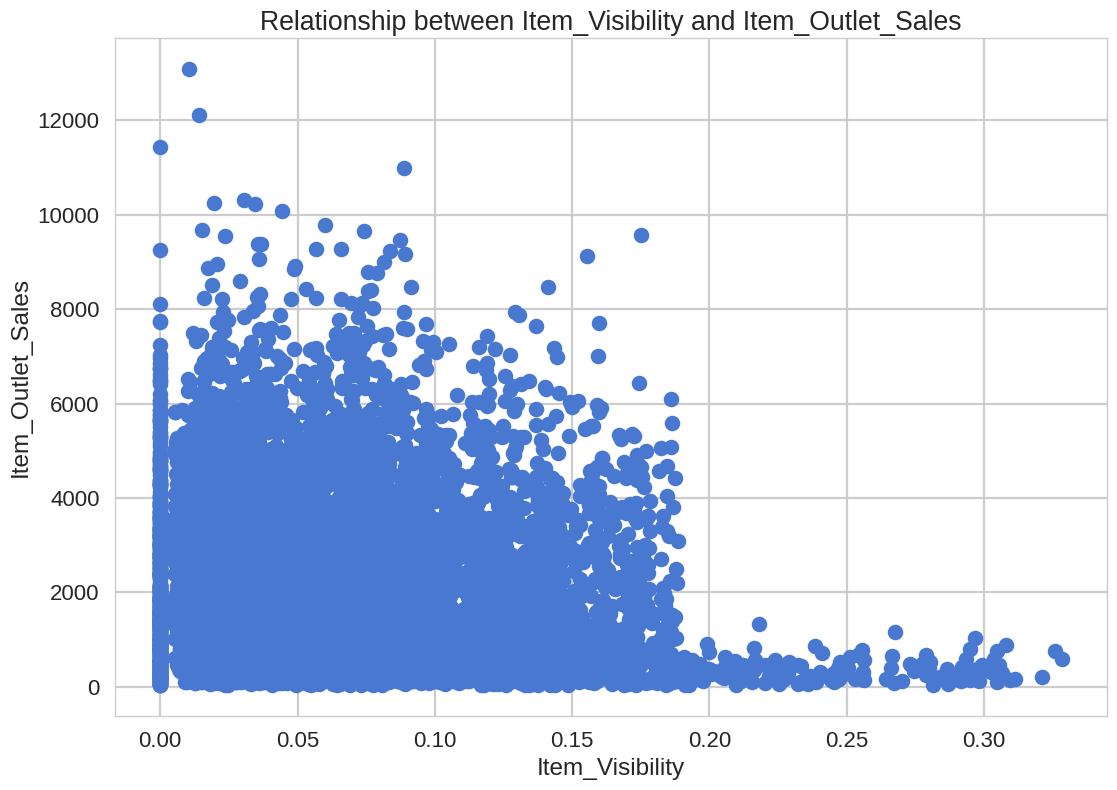

In [52]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(df_sale_predictions['Item_Visibility'], df_sale_predictions['Item_Outlet_Sales'], 'o')

# Add a label to the graph
plt.title('Relationship between Item_Visibility and Item_Outlet_Sales')

# Add labels to the x-axis and y-axis
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

# Show the graph
plt.show()

The implication of this graph is that there is a weak negative relationship between Item_Visibility and Item_Outlet_Sales, meaning that items with higher visibility tend to have lower sales than items with lower visibility, but the relationship is not very strong or consistent. The graph shows the distribution of the data points and the slope of the line of best fit. This graph can help you explore and understand the data better, but it does not imply any causal relationship between the variables.

To draw a bar chart comparing Item_Fat_Content to Item_Outlet_Sales.

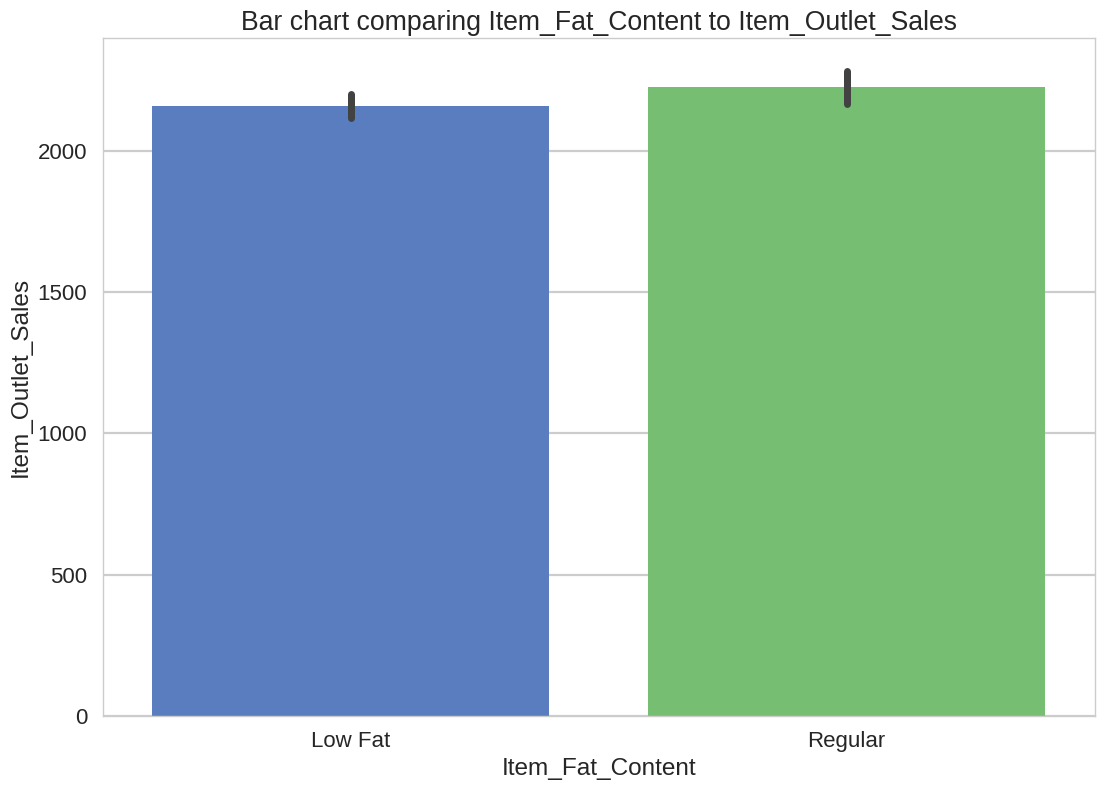

In [53]:
# Import seaborn library
import seaborn as sns

# Plot the bar chart
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_sale_predictions)

# Add a label to the graph
plt.title('Bar chart comparing Item_Fat_Content to Item_Outlet_Sales')

# Show the graph
plt.show()

The implication of the graph is that there is a slight difference in the mean Item_Outlet_Sales between the low fat and regular Item_Fat_Content categories, with the regular category having a slightly higher mean. The graph also shows the distribution of the data points and the confidence intervals for the mean. An outlier is a data point that is far away from the rest of the data points. In this graph, there is one outlier in the low fat category that has a very high Item_Outlet_Sales value. This could be due to an error in the data collection or an unusual case that needs further investigation

# **Project 1 - Part 5**

# Preprocesing for Machine Learning



For Part 5, you will go back to your original dataset with the goal of preventing data leakage.

Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.

Identify the target (X) and features (y): We will assign the 'salary_in_usd' as the target and the rest of the relevant variables as the features matrix.
Perform a train test split
Create a pre processing pipeline to prepare the dataset for Machine Learning

In [54]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

Reloading in the Data

In [55]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Performing Preprocessing Steps

In [56]:
# Checking for Duplicates
df2.duplicated().sum()

0

In [57]:
# Checking missing values
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#To replace the missing values in ‘Item_Weight’ with the median and the missing values in ‘Outlet_Size’ with ‘Unknown’, you can use two different SimpleImputer objects with different strategies and fill values. 

In [62]:
# import libraries
from sklearn.impute import SimpleImputer

# define imputer for Item_Weight
imputer_weight = SimpleImputer(strategy='median')

# fit and transform the data
df2['Item_Weight'] = imputer_weight.fit_transform(df2[['Item_Weight']])

# define imputer for Outlet_Size
imputer_size = SimpleImputer(strategy='constant', fill_value='Unknown')

# fit and transform the data
df2['Outlet_Size'] = imputer_size.fit_transform(df2[['Outlet_Size']])

In [63]:
# Checking missing values
df2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

No More Missing Items

# **Replacing inconsistent categories**

In [66]:
# Replace the different options in Item_Fat_Content to "Low Fat" and "Regular"
df2['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [67]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# **Defining X and y**

In [81]:


## Define features (X) and target (y)
target = 'Item_Outlet_Sales'
X = df2.drop(columns = [target])
y = df2[target]

In [71]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Train-Test-Split**

In [74]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split




In [82]:
# Split the data into train and test sets with a 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)



# **Making a Preprocessing Pipeline**

In [91]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [92]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [93]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [95]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [96]:
## test num_pipe 
scaler.fit_transform(X_train[num_selector(X_train)])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,-0.789456,-0.600703,0.470709,0.136169
7757,1.221421,-0.362159,0.457877,0.493521
764,1.126791,0.194933,-0.482625,-0.102066
6867,-1.067430,-0.704944,-1.603553,0.493521
2716,0.003066,1.383177,0.218375,-0.102066
...,...,...,...,...
5734,-0.814297,4.282848,-0.043511,0.017052
5191,0.653644,1.001006,-1.059078,1.089109
5390,1.126791,-0.916931,1.526207,0.493521
860,1.777369,-0.228187,-0.383072,1.089109


In [97]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

# **Prepare the Data**

# Identify the datatypes for each feature

# Ordinal: None

# Numeric: 'year, 'price', 'mileage', 'tax', 'engineSize'

# Nominal: 'model', 'transmission', 'fuelType'

# ColumnSelector

In [83]:
## Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Transformers

In [84]:
## Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Tuples

In [85]:
## Create tuples
number_tuple = ('numeric', scaler, num_selector)
category_tuple = ('categorical',ohe, cat_selector)

# ColumnTransformer

In [86]:
ColumnTransformer,
## Create the preprocessor using make_column_transformer
preprocessor = ColumnTransformer([number_tuple, 
                                       category_tuple], 
                                       remainder='drop', verbose_feature_names_out=False)

# Check that the preprocessing is working

In [87]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f20d9017610>),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f20d9014a30>)],
                  verbose_feature_names_out=False)

In [88]:
# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [89]:
# Transform the X_train and the X_test
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Check the Result

In [90]:
# Display the first (5) rows of the dataframe
display(X_train_proc.head())
# Check the shape
print(f'\nshape of processed data is: {X_train_proc.shape}')
# Check for remaining missing values
print(f'\nThere are {X_train_proc.isna().sum().sum()} missing values')
# Check the data types
print(f'\nThe datatypes are {X_train_proc.dtypes}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,-0.789456,-0.600703,0.470709,0.136169,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7757,1.221421,-0.362159,0.457877,0.493521,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
764,1.126791,0.194933,-0.482625,-0.102066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6867,-1.067430,-0.704944,-1.603553,0.493521,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2716,0.003066,1.383177,0.218375,-0.102066,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0



shape of processed data is: (6818, 1598)

There are 0 missing values

The datatypes are Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Establishment_Year        float64
Item_Identifier_DRA12            float64
                                  ...   
Outlet_Location_Type_Tier 3      float64
Outlet_Type_Grocery Store        float64
Outlet_Type_Supermarket Type1    float64
Outlet_Type_Supermarket Type2    float64
Outlet_Type_Supermarket Type3    float64
Length: 1598, dtype: object
